<a href="https://colab.research.google.com/github/js2nijjar/xgboost/blob/main/XGBoost3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('lending_club_loan_two.csv.zip', compression='zip')

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.shape

(396030, 27)

In [ ]:
df.describe(include = 'all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USS Johnson\r\nFPO AE 48052
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [ ]:
df.dtypes

,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object
home_ownership,object
annual_inc,float64


In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install hvplot

In [ ]:
import hvplot.pandas  # enables hvplot on DataFrames and Series

In [ ]:
# Exploratory Data Analysis

In [ ]:
df['loan_status'].value_counts().hvplot.bar(title = 'Loan Status Count', xlabel = 'Loan Status', ylabel = 'Count', height = 500, width = 500)
# Imbalanced dataset with 318357 Fully Paid(non-default) and 77673 Charged Off(default)

:Bars   [loan_status]   (count)

In [ ]:
corr = df.select_dtypes(include = ['number']).corr()
corr

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

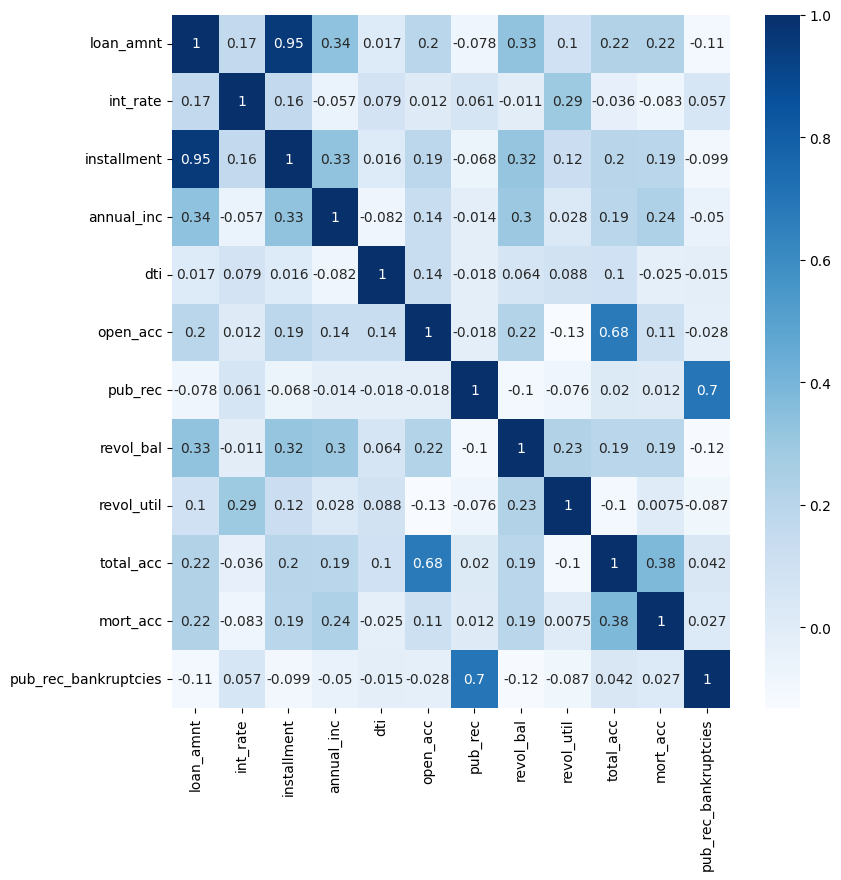

In [ ]:
plt.figure(figsize = (9, 9))
sns.heatmap(corr, annot = True, cmap = 'Blues')
# loan_amnt and installment are highly correlated
# The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
# The monthly payment owed by the borrower if the loan originates.

In [ ]:
installment = df.hvplot.hist(y = "installment" , by = "loan_status", title = 'Installment by Loan Status', xlabel = 'Installment', ylabel = 'Count', height = 500, width = 800, alpha = 0.5, bins = 50, color= 'blue')
# histogram plot of installment split by loan_status

In [ ]:
loan_amnt = df.hvplot.hist(y = "loan_amnt" , by = "loan_status", title = 'loan_amnt by Loan Status', xlabel = 'loan_amnt', ylabel = 'Count', height = 500, width = 800, alpha = 0.5, bins = 50, color= 'blue')
# histogram plot of loan_amnt split by loan_status

In [ ]:
installment + loan_amnt
# plots side-by side

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (Count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (Count)

In [ ]:
df['installment_bin'] = pd.cut(df['installment'], bins = 50)

In [ ]:
df.groupby('installment_bin')['loan_status'].value_counts(normalize=True).unstack()
# higher installments higher chance of default

/tmp/ipython-input-2468431301.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('installment_bin')['loan_status'].value_counts(normalize=True).unstack()


loan_status,Charged Off,Fully Paid
installment_bin,,
"(14.562, 46.435]",0.124022,0.875978
"(46.435, 76.789]",0.141614,0.858386
"(76.789, 107.144]",0.158028,0.841972
"(107.144, 137.498]",0.157918,0.842082
"(137.498, 167.853]",0.158540,0.841460
"(167.853, 198.208]",0.161624,0.838376
"(198.208, 228.562]",0.161844,0.838156
"(228.562, 258.917]",0.177769,0.822231
"(258.917, 289.271]",0.202405,0.797595


In [ ]:
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], bins = 50)

In [ ]:
df.groupby('loan_amnt_bin')['loan_status'].value_counts(normalize=True).unstack()
# higher loan amount higher chance of default

/tmp/ipython-input-3282294232.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('loan_amnt_bin')['loan_status'].value_counts(normalize=True).unstack()


loan_status,Charged Off,Fully Paid
loan_amnt_bin,,
"(460.5, 1290.0]",0.124393,0.875607
"(1290.0, 2080.0]",0.143213,0.856787
"(2080.0, 2870.0]",0.161302,0.838698
"(2870.0, 3660.0]",0.162228,0.837772
"(3660.0, 4450.0]",0.169541,0.830459
"(4450.0, 5240.0]",0.175989,0.824011
"(5240.0, 6030.0]",0.150402,0.849598
"(6030.0, 6820.0]",0.174272,0.825728
"(6820.0, 7610.0]",0.163903,0.836097


In [ ]:
loan_amnt_box = df.hvplot.box(
    y='loan_amnt', by='loan_status', width=500, height=500,
    title="Loan Status by Loan Amount ", xlabel='Loan Status', ylabel='Loan Amount'
)

installment_box = df.hvplot.box(
    y='installment', by='loan_status', width=500, height=500,
    title="Loan Status by Installment", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box + installment_box
# The median for charged off is slightly higher so borrowers who take on bigger loans and pay bigger installments tend to default more
# box plots overlap a lot for both categories meaning people with small loan amounts and small installments end up in both categories so these alone cannot predict default or no default
# There are a lot of outliers so big loans and big installments don't guarantee default

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
df.groupby('loan_status')['installment'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,452.703110,249.096609,21.62,274.86,399.06,585.67,1527.00
Fully Paid,318357.0,426.761866,250.861622,16.08,244.46,369.51,562.89,1533.81


In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,installment_bin,loan_amnt_bin
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690","(319.626, 349.981]","(9980.0, 10770.0]"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113","(258.917, 289.271]","(7610.0, 8400.0]"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113","(501.754, 532.108]","(15510.0, 16300.0]"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813","(198.208, 228.562]","(6820.0, 7610.0]"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650","(592.817, 623.172]","(24200.0, 24990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723","(198.208, 228.562]","(9980.0, 10770.0]"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...","(683.881, 714.236]","(20250.0, 21040.0]"
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...","(137.498, 167.853]","(4450.0, 5240.0]"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...","(501.754, 532.108]","(20250.0, 21040.0]"


In [ ]:
# grade	LC assigned loan grade
# sub_grade	LC assigned loan subgrade

In [ ]:
df.loc[df['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar() * df.loc[df['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar(title="Loan Status by Grade", xlabel='Grade', ylabel='Count')
# filtering the loan status columnn for Fully Paid and Charged off and then selecting the grades column. Counting the values and creating a bar chart on top of each other.

:Overlay
   .Bars.Count.I  :Bars   [grade]   (count)
   .Bars.Count.II :Bars   [grade]   (count)

In [ ]:
df.loc[df['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar() * df.loc[df['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.bar(title="Loan Status by Sub Grade", xlabel='Sub_grade', ylabel='Count')

:Overlay
   .Bars.Count.I  :Bars   [sub_grade]   (count)
   .Bars.Count.II :Bars   [sub_grade]   (count)

<Axes: xlabel='grade', ylabel='count'>

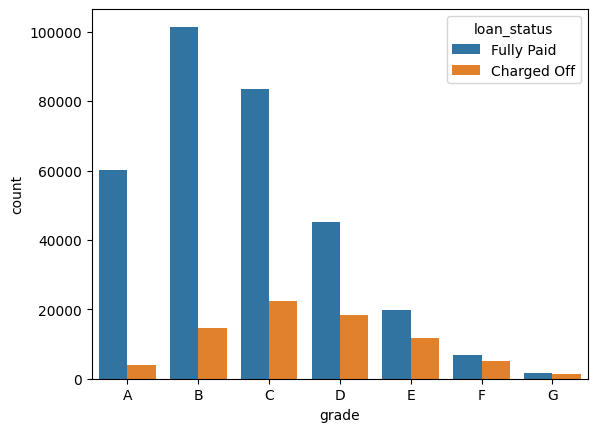

In [ ]:
sns.countplot(x='grade', data=df, hue='loan_status', order=sorted(df['grade'].unique()))
# ordered plot
# higher grades are Fully Paid
# lower grades have higher proportion of Charged Off

<Axes: xlabel='sub_grade', ylabel='count'>

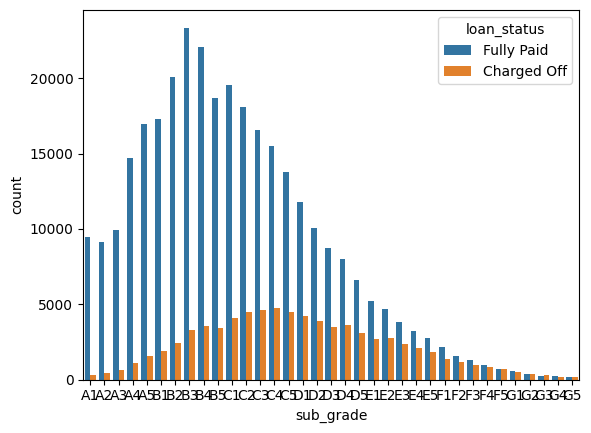

In [ ]:
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sorted(df['sub_grade'].unique()))
# A's almost all Fully Paid
# Default rises for B and C
# Default proportion also rises

In [ ]:
df2 = df[(df['grade'] == 'F') | (df['grade'] == 'G')]

<Axes: xlabel='grade', ylabel='count'>

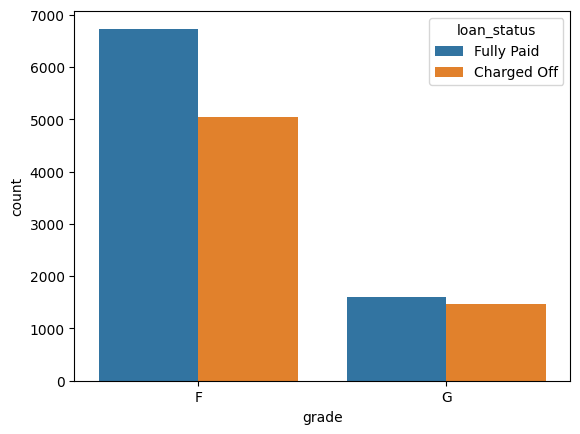

In [ ]:
sns.countplot(x='grade', data=df2, hue='loan_status', order=sorted(df2['grade'].unique()))

<Axes: xlabel='sub_grade', ylabel='count'>

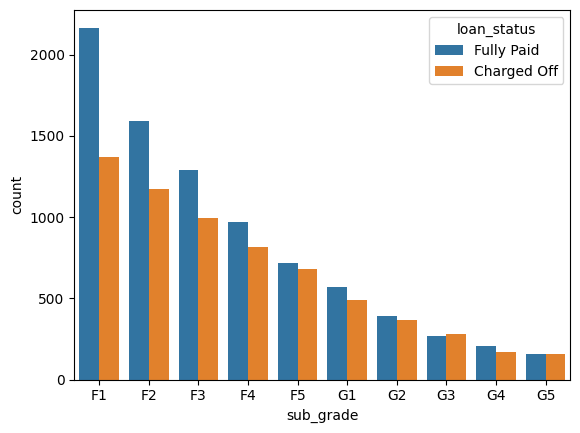

In [ ]:
sns.countplot(x='sub_grade', data=df2, hue='loan_status', order=sorted(df2['sub_grade'].unique()))
# After F4 Fully Paid = Charged Off

In [ ]:
# sub_grade carries more predictive signal than grade

<Axes: xlabel='home_ownership', ylabel='count'>

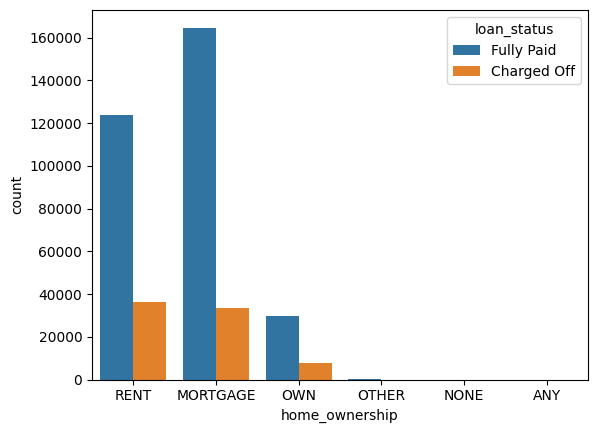

In [ ]:
sns.countplot(x='home_ownership', data=df, hue='loan_status')
# the default rate across rent and mortgage is uniform so its not a great predictor by itself

In [ ]:
# group other/none/any together
df.loc[(df['home_ownership'] == "NONE") | (df['home_ownership'] == "ANY"), 'home_ownership'] = 'OTHER'

<Axes: xlabel='home_ownership', ylabel='count'>

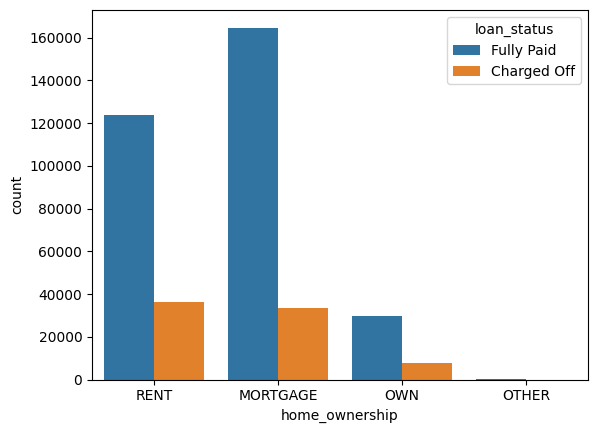

In [ ]:
sns.countplot(x='home_ownership', data=df, hue='loan_status')

<Axes: xlabel='term', ylabel='count'>

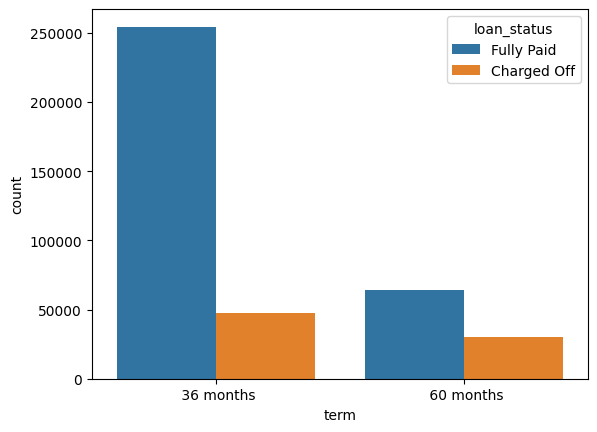

In [ ]:
sns.countplot(x='term', data=df, hue='loan_status')
# longer term loans are riskier, higher default %

<Axes: xlabel='verification_status', ylabel='count'>

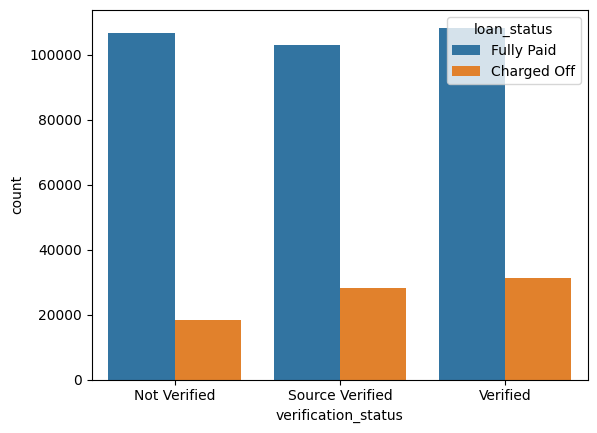

In [ ]:
sns.countplot(x='verification_status', data=df, hue='loan_status')
# counter intuitive you would think verified loans would default less
# so maybe they needed extra checks cause the borrower was riskier

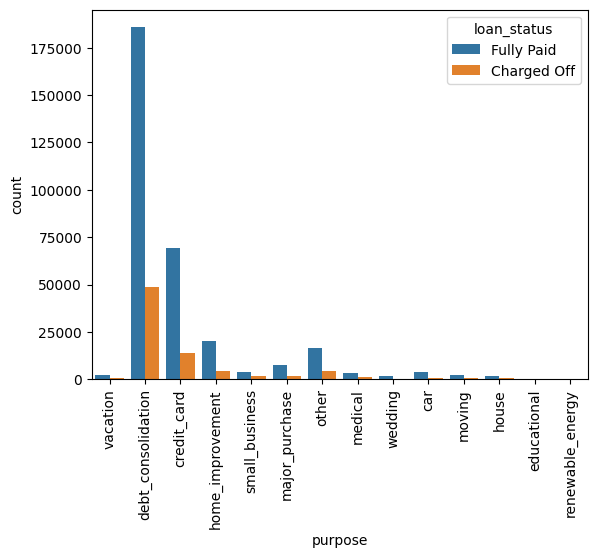

In [ ]:
sns.countplot(x='purpose', data=df, hue='loan_status')
plt.xticks(rotation=90)
plt.show()
# % default risk for small business, medical, moving is higher than debt_consolidation and credit card
# could group categoires with low counts

In [ ]:
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,234507
credit_card,83019
home_improvement,24030
other,21185
major_purchase,8790
small_business,5701
car,4697
medical,4196
moving,2854


In [ ]:
df.loc[df['loan_status'] == 'Fully Paid', 'purpose'].value_counts()

,count
purpose,
debt_consolidation,185867
credit_card,69145
home_improvement,19943
other,16690
major_purchase,7342
car,4064
small_business,4022
medical,3285
moving,2184


In [ ]:
df.loc[df['loan_status'] == 'Charged Off', 'purpose'].value_counts()

,count
purpose,
debt_consolidation,48640
credit_card,13874
other,4495
home_improvement,4087
small_business,1679
major_purchase,1448
medical,911
moving,670
car,633


In [ ]:
int_rate = df.hvplot.hist(y = "int_rate" , by = "loan_status", title = 'Loan Status by Interest Rate', xlabel = 'int_rate', ylabel = 'Count', height = 500, width = 800, alpha = 0.5, bins = 50, color= 'blue')

In [ ]:
annual_inc = df[df['annual_inc'] < 300000].hvplot.hist(y = "annual_inc" , by = "loan_status", title = 'Loan Status by Annual Income', xlabel = 'annual_inc', ylabel = 'Count', height = 500, width = 800, alpha = 0.5, bins = 50, color= 'blue')
# a lot of outliers skews data

In [ ]:
int_rate
# higher interest rate higher % chance of default

:NdOverlay   [loan_status]
   :Histogram   [int_rate]   (Count)

In [ ]:
annual_inc
# lower income higher default risk

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (Count)

In [ ]:
df['emp_length'].value_counts()

,count
emp_length,
10+ years,126041
2 years,35827
< 1 year,31725
3 years,31665
5 years,26495
1 year,25882
4 years,23952
6 years,20841
7 years,20819


In [ ]:
df.loc[df['loan_status'] == 'Fully Paid', 'emp_length'].value_counts().hvplot.bar() * df.loc[df['loan_status'] == 'Charged Off', 'emp_length'].value_counts().hvplot.bar(title="Loan Status by Employment Length", xlabel='Employment Length', ylabel='Count')

:Overlay
   .Bars.Count.I  :Bars   [emp_length]   (count)
   .Bars.Count.II :Bars   [emp_length]   (count)

<Axes: xlabel='emp_length', ylabel='count'>

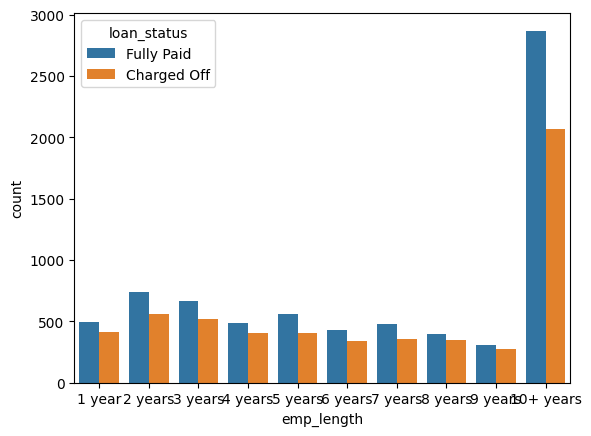

In [ ]:
sns.countplot(x='emp_length', data=df2, hue='loan_status', order=['1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
# defaults look similar for everything other than 10+ years of employment

In [ ]:
df['emp_title'].nunique()
# too many unique values drop this column

173105

In [ ]:
df[df['dti']<50].hvplot.hist(y = "dti" , by = "loan_status", title = 'Loan Status by Debt-to-Income Ratio', xlabel = 'dti', ylabel = 'Count', height = 500, width = 800, alpha = 0.5, bins = 50, color= 'blue')
# a lot of outliers skews data
# tail end dti charged off % increasing

:NdOverlay   [loan_status]
   :Histogram   [dti]   (Count)

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,installment_bin,loan_amnt_bin
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690","(319.626, 349.981]","(9980.0, 10770.0]"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113","(258.917, 289.271]","(7610.0, 8400.0]"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113","(501.754, 532.108]","(15510.0, 16300.0]"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813","(198.208, 228.562]","(6820.0, 7610.0]"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650","(592.817, 623.172]","(24200.0, 24990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723","(198.208, 228.562]","(9980.0, 10770.0]"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...","(683.881, 714.236]","(20250.0, 21040.0]"
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...","(137.498, 167.853]","(4450.0, 5240.0]"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...","(501.754, 532.108]","(20250.0, 21040.0]"


In [ ]:
# Data PreProcessing

In [ ]:
df.drop(['emp_title', 'installment_bin', 'loan_amnt_bin'], axis = 1, inplace = True)
# emp_title has 173105 uniques
# installment_bin and loan_amnt_bin were to make box plots

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
for col in df['emp_length'].unique():
  print(col)
  print(df.loc[df['emp_length'] == col, 'loan_status'].value_counts(normalize=True))
  # the proportion of default and non-default is the same across all columns so drop it

10+ years
loan_status
Fully Paid     0.815814
Charged Off    0.184186
Name: proportion, dtype: float64
4 years
loan_status
Fully Paid     0.807615
Charged Off    0.192385
Name: proportion, dtype: float64
< 1 year
loan_status
Fully Paid     0.793128
Charged Off    0.206872
Name: proportion, dtype: float64
6 years
loan_status
Fully Paid     0.810806
Charged Off    0.189194
Name: proportion, dtype: float64
9 years
loan_status
Fully Paid     0.79953
Charged Off    0.20047
Name: proportion, dtype: float64
2 years
loan_status
Fully Paid     0.806738
Charged Off    0.193262
Name: proportion, dtype: float64
3 years
loan_status
Fully Paid     0.804769
Charged Off    0.195231
Name: proportion, dtype: float64
8 years
loan_status
Fully Paid     0.80024
Charged Off    0.19976
Name: proportion, dtype: float64
7 years
loan_status
Fully Paid     0.805226
Charged Off    0.194774
Name: proportion, dtype: float64
5 years
loan_status
Fully Paid     0.807813
Charged Off    0.192187
Name: proportion, dtype:

In [ ]:
df.drop('emp_length', axis = 1, inplace = True)

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
df['title'].nunique()
# too many uniques drop this column

48816

In [ ]:
df.drop('title', axis = 1, inplace = True)

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
# mort_acc correlates the most with total_acc
# mort_acc	Number of mortgage accounts.
# total_acc	The total number of credit lines currently in the borrower's credit file

In [ ]:
# Method 1 - Replacing with the average by filtering total_acc column
# a = df.groupby('total_acc')['mort_acc'].mean()
# df['mort_acc'] = df['mort_acc'].fillna(df['total_acc'].map(a))

In [ ]:
# Method 2 - Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
features = ["total_acc"]
target = "mort_acc"

In [ ]:
not_missing = df[target].notna()
missing = df[target].isna()

In [ ]:
X_train = df.loc[not_missing, features]
y_train = df.loc[not_missing, target]

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_missing = df.loc[missing, features]
df.loc[missing, target] = reg.predict(X_missing)

In [ ]:
df['mort_acc'] = df['mort_acc'].round().astype(int)

In [ ]:
df.dropna(inplace = True)
# drop 276 revol_util and 535 pub_rec_bankruptcies

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
# All missing values have been handeled

In [ ]:
categorical_columns = [col for col in df.select_dtypes(include = ['object']).columns]
categorical_columns

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
# df['term'] = df['term'].str.split().str[0].astype(int)
df['term'] = df['term'].map({' 36 months' : 36, ' 60 months' : 60})

In [ ]:
# drop grade and keep sub grade
df.drop('grade', axis=1, inplace=True)

In [ ]:
for col in df.select_dtypes(include = ['object']).columns:
  print(col)
  print(df[col].unique())

sub_grade
['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
home_ownership
['RENT' 'MORTGAGE' 'OWN' 'OTHER']
verification_status
['Not Verified' 'Source Verified' 'Verified']
issue_d
['Jan-2015' 'Nov-2014' 'Apr-2013' 'Sep-2015' 'Sep-2012' 'Oct-2014'
 'Apr-2012' 'Jun-2013' 'May-2014' 'Dec-2015' 'Apr-2015' 'Oct-2012'
 'Jul-2014' 'Feb-2013' 'Oct-2015' 'Jan-2014' 'Mar-2016' 'Apr-2014'
 'Jun-2011' 'Apr-2010' 'Jun-2014' 'Oct-2013' 'May-2013' 'Feb-2015'
 'Oct-2011' 'Jun-2015' 'Aug-2013' 'Feb-2014' 'Dec-2011' 'Mar-2013'
 'Jun-2016' 'Mar-2014' 'Nov-2013' 'Dec-2014' 'Apr-2016' 'Sep-2013'
 'May-2016' 'Jul-2015' 'Jul-2013' 'Aug-2014' 'May-2008' 'Mar-2010'
 'Dec-2013' 'Mar-2012' 'Mar-2015' 'Sep-2011' 'Jul-2012' 'Dec-2012'
 'Sep-2014' 'Nov-2012' 'Nov-2015' 'Jan-2011' 'May-2012' 'Feb-2016'
 'Jun-2012' 'Aug-2012' 'Jan-2016' 'May-2015' 'Oct-2016' 'Aug-2015'
 'Jul-2016' 'May-2

In [ ]:
other_purposes = ['car','medical','moving','vacation','house','wedding','renewable_energy','educational']
df['purpose_grouped'] = df['purpose'].apply(lambda x: 'other_purpose' if x in other_purposes else x)
# too cut down on unique values when one hot encoding

In [ ]:
df.drop('purpose', axis = 1, inplace = True)

In [ ]:
# one hot encode columns with no clear order and use a label encoder on columns with order
dummies = ['home_ownership', 'verification_status', 'purpose_grouped', 'initial_list_status', 'application_type']
df = pd.get_dummies(df, columns = dummies, drop_first = True, dtype = int)

In [ ]:
df

,loan_amnt,term,int_rate,installment,sub_grade,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,verification_status_Verified,purpose_grouped_debt_consolidation,purpose_grouped_home_improvement,purpose_grouped_major_purchase,purpose_grouped_other,purpose_grouped_other_purpose,purpose_grouped_small_business,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,329.48,B4,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,1,0,1,1,0
1,8000.0,36,11.99,265.68,B5,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,1,0,0,0,0,0,0,1,0
2,15600.0,36,10.49,506.97,B3,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,A2,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,609.33,C5,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,1,0,0,0,0,0,1,1,0
396026,21000.0,36,12.29,700.42,C1,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,1,0,0,0,0,0,0,1,0
396027,5000.0,36,9.99,161.32,B1,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,1,1,0,0,0,0,0,0,1,0
396028,21000.0,60,15.31,503.02,C2,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
# going to manually do it as LabelEncoder was not encoding in order
df['sub_grade'] = df['sub_grade'].map({'A1' : 0, 'A2' : 1, 'A3' : 2, 'A4' : 3, 'A5' : 4, 'B1' : 5, 'B2' : 6, 'B3' : 7, 'B4' : 8, 'B5' : 9, 'C1' : 10, 'C2' : 11, 'C3' : 12, 'C4' : 13, 'C5' : 14, 'D1' : 15, 'D2' : 16, 'D3' : 17, 'D4' : 18, 'D5' : 19, 'E1' : 20, 'E2' : 21, 'E3' : 22, 'E4' : 23, 'E5' : 24, 'F1' : 25, 'F2' : 26, 'F3' : 27, 'F4' : 28, 'F5' : 29, 'G1' : 30, 'G2' : 31, 'G3' : 32, 'G4' : 33, 'G5' : 34})

In [ ]:
# issue_d and earliest_cr_line and address

In [ ]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [ ]:
df

,loan_amnt,term,int_rate,installment,sub_grade,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_grouped_debt_consolidation,purpose_grouped_home_improvement,purpose_grouped_major_purchase,purpose_grouped_other,purpose_grouped_other_purpose,purpose_grouped_small_business,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,zip_code
0,10000.0,36,11.44,329.48,8,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,1,0,1,1,0,22690
1,8000.0,36,11.99,265.68,9,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,1,0,0,0,0,0,0,1,0,05113
2,15600.0,36,10.49,506.97,7,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,1,0,05113
3,7200.0,36,6.49,220.65,1,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,1,0,00813
4,24375.0,60,17.27,609.33,14,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,1,0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,8,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,1,0,0,0,0,0,1,1,0,30723
396026,21000.0,36,12.29,700.42,10,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,1,0,0,0,0,0,0,1,0,05113
396027,5000.0,36,9.99,161.32,5,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,1,0,0,0,0,0,0,1,0,70466
396028,21000.0,60,15.31,503.02,11,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,1,0,0,0,0,0,0,1,0,29597


In [ ]:
df.drop('address', axis = 1, inplace = True)

In [ ]:
df = pd.get_dummies(df, columns = ['zip_code'], drop_first = True, dtype = int)

In [ ]:
df

,loan_amnt,term,int_rate,installment,sub_grade,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,329.48,8,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,9,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,7,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,1,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,14,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,8,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,10,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,5,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,11,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# issue_d	The month which the loan was funded
# earliest_cr_line	The month the borrower's earliest reported credit line was opened

In [ ]:
# the model will learn that loans in x year will default more (macroeconmic trend) rather than understanding individual borrower risk

In [ ]:
df['earliest_cr_line']

,earliest_cr_line
0,Jun-1990
1,Jul-2004
2,Aug-2007
3,Sep-2006
4,Mar-1999
...,...
396025,Nov-2004
396026,Feb-2006
396027,Mar-1997
396028,Nov-1990


In [ ]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%Y', errors = 'coerce').dt.year

In [ ]:
df['earliest_cr_line']

,earliest_cr_line
0,1990
1,2004
2,2007
3,2006
4,1999
...,...
396025,2004
396026,2006
396027,1997
396028,1990


In [ ]:
df['earliest_cr_line'].nunique()

65

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%Y', errors = 'coerce').dt.year

In [ ]:
df['issue_d']

,issue_d
0,2015
1,2015
2,2015
3,2014
4,2013
...,...
396025,2015
396026,2015
396027,2013
396028,2012


In [ ]:
df['credit_length_history'] = df['issue_d'] - df['earliest_cr_line']

In [ ]:
df['credit_length_history']

,credit_length_history
0,25
1,11
2,8
3,8
4,14
...,...
396025,11
396026,9
396027,16
396028,22


In [ ]:
df.drop(['issue_d', 'earliest_cr_line'], axis = 1, inplace = True)

In [ ]:
df.dtypes

,0
loan_amnt,float64
term,int64
int_rate,float64
installment,float64
sub_grade,int64
annual_inc,float64
loan_status,object
dti,float64
open_acc,float64
pub_rec,float64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Outliers
# categorical -> group into categoires
# numerical -> extreme values
# note even though loan_amnt and installment are very highly correlated 0.95 keep both since XGBoost will just pick whicever feature is more useful for a split as aposed to linear models

In [ ]:
numerical_columns = ['loan_amnt',	'int_rate',	'installment',	'annual_inc',	'dti',	'open_acc',	'pub_rec',	'revol_bal',	'revol_util',	'total_acc',	'mort_acc',	'pub_rec_bankruptcies']

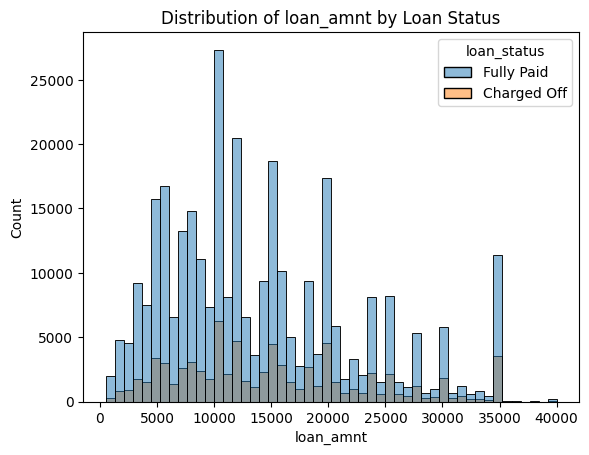

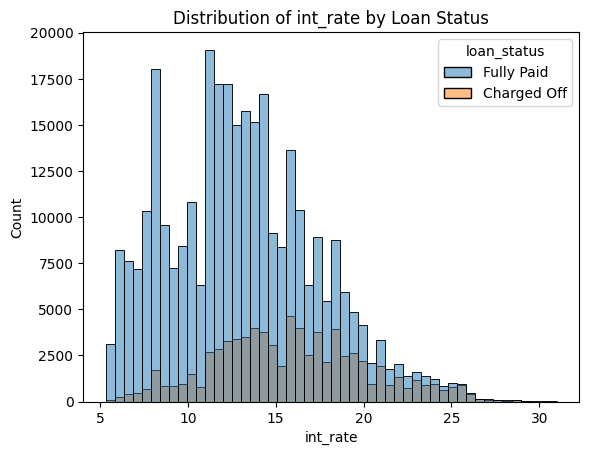

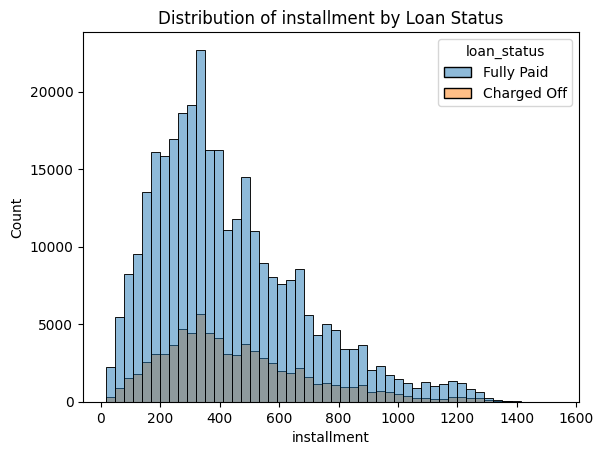

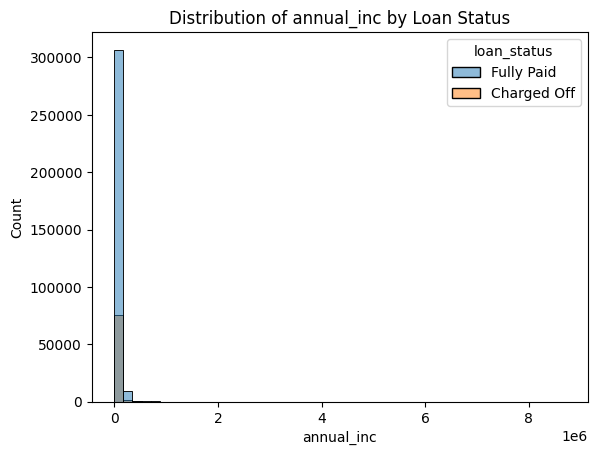

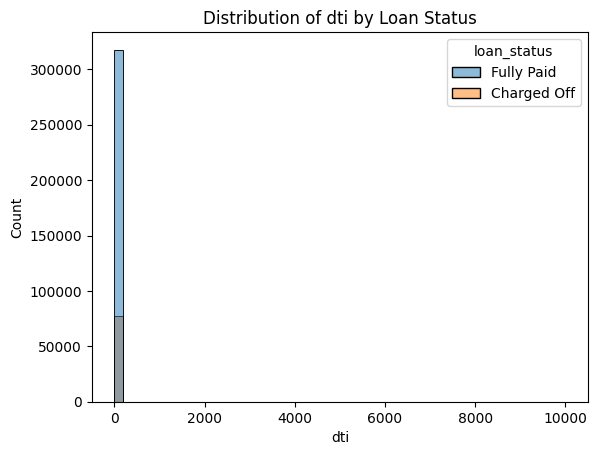

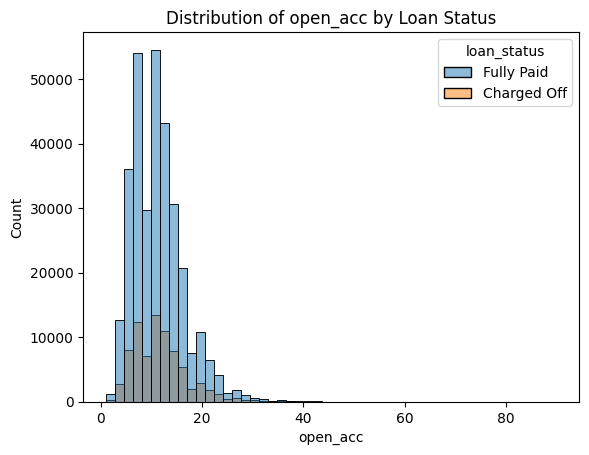

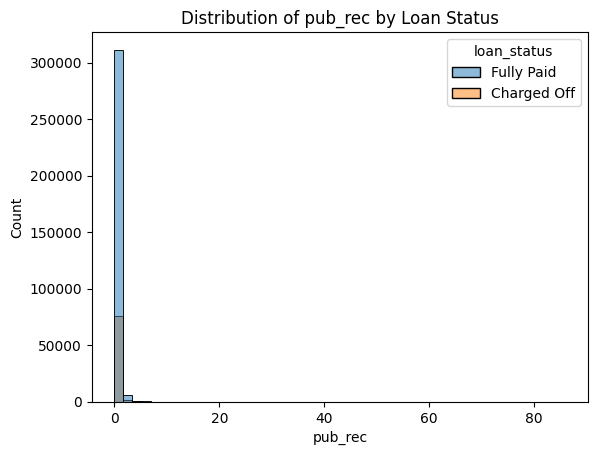

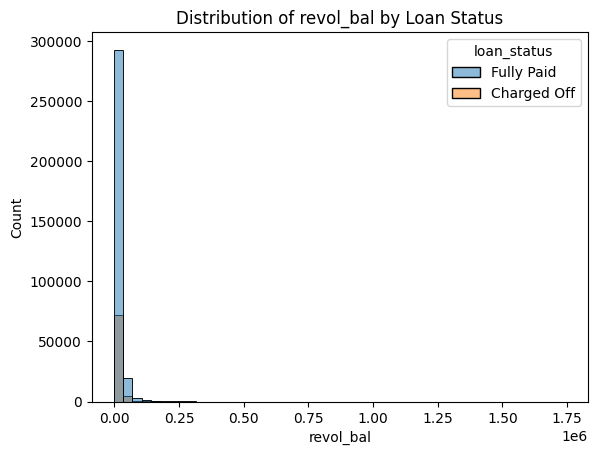

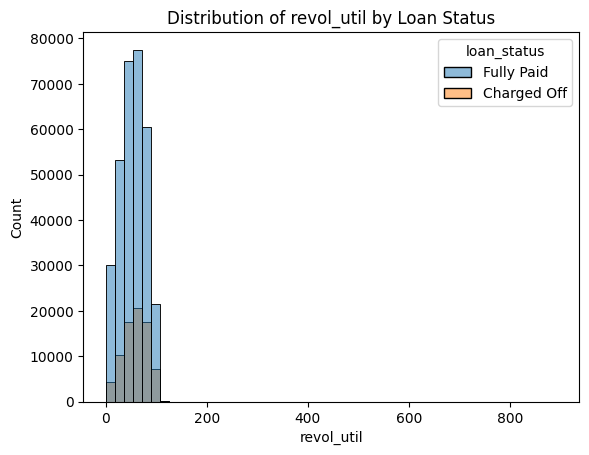

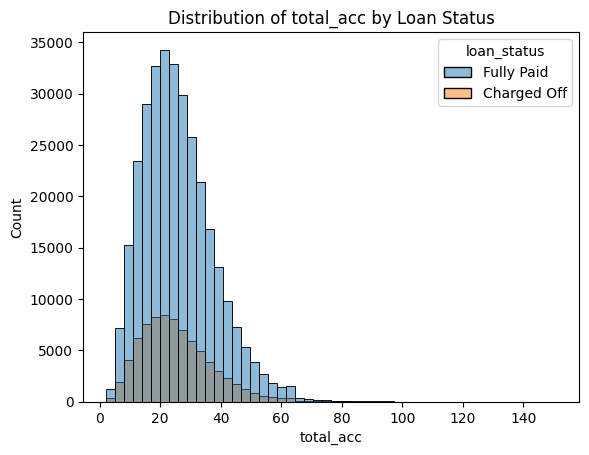

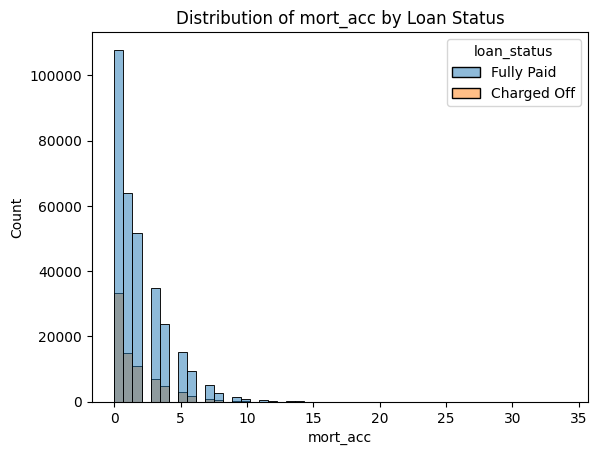

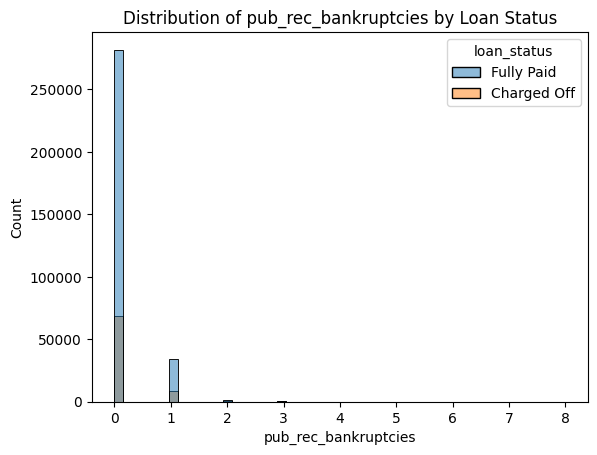

In [ ]:
for col in numerical_columns:
    plt.figure()
    sns.histplot(data=df, x=col, hue="loan_status", bins=50)
    plt.title(f"Distribution of {col} by Loan Status")
    plt.show()


In [ ]:
df['pub_rec_bankruptcies'].value_counts()
# if i cap pub_rec_bankruptcies to 0,1,2=multiple is the best

,count
pub_rec_bankruptcies,
0.0,350108
1.0,42786
2.0,1847
3.0,351
4.0,82
5.0,32
6.0,7
7.0,4
8.0,2


In [ ]:
df.shape

(395219, 39)

In [ ]:
# Most of this is done by eyeballing the graphs rather than using IQR
# 0 - none, 1 - one, 2 - multiple
df = df[df['pub_rec_bankruptcies'] < 3]
df = df[df['mort_acc'] < 20]
df = df[df['total_acc'] < 100]
# I capped revolving credit at 100 % so for example if someone has a limit of 10k and say the borrow 4k and pay back 2k then they can borrow up to 8k but in the real world you can technically borrow more and pay more fees.
# no need to scale values between 0 and 1 as trees don't care about the numerical values only the split matters.
df = df[df['revol_util'] < 100]
df = df[df['revol_bal'] < df['revol_bal'].quantile(0.995)]
df = df[df['pub_rec'] < 10]
df = df[df['open_acc'] < 60]
# dti is probably less in real world but for modelling purposes keep < 50 %
df = df[df['dti'] < 50]
df = df[df['annual_inc'] < 250000]

In [ ]:
df.shape

(387765, 39)

In [ ]:
df['loan_status'] = df['loan_status'].map({'Fully Paid' : 0, 'Charged Off' : 1})

In [ ]:
df.drop(['zip_code_05113', 'zip_code_11650', 'zip_code_22690', 'zip_code_29597', 'zip_code_30723', 'zip_code_48052', 'zip_code_70466', 'zip_code_86630', 'zip_code_93700'], axis = 1, inplace = True)

In [ ]:
X = df.drop('loan_status', axis=1)

In [ ]:
y = df['loan_status']

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
xgb.fit(X, y)
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
print("XGBoost Feature Importance:")
print(xgb_importances)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:06:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Feature Importance:
sub_grade                              0.306088
term                                   0.104239
home_ownership_RENT                    0.040554
application_type_JOINT                 0.031612
mort_acc                               0.027858
purpose_grouped_small_business         0.027757
dti                                    0.027553
int_rate                               0.026310
annual_inc                             0.025040
application_type_INDIVIDUAL            0.022621
installment                            0.021425
verification_status_Source Verified    0.020480
pub_rec                                0.020338
loan_amnt                              0.020250
home_ownership_OTHER                   0.020095
pub_rec_bankruptcies                   0.019924
revol_bal                              0.019775
revol_util                             0.019511
initial_list_status_w                  0.019180
purpose_grouped_home_improvement       0.019009
open_acc    

In [ ]:
# one-hot encoded zip_code hijacked the model. After careful analysis it seems the zip codes are synthetic so I'll drop the column.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#stratify = y - class proportions in test and train set the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from collections import Counter

In [ ]:
# count how many samples are in each class
# not scaling the data just giving the number to the model, it is a training parameter. Tells the model to increase the importance of the 1 class which is defaulting
# since not defaulting happens a lot more.
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]
scale_pos_weight

4.087611112933382

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# split training set into K folds, use K-1 folds for training and 1 for testing
# then repeat once all folds have been using for testing
# maintain class ratio across folds since there are a lot less defaults
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 400, 410)
    learning_rate = trial.suggest_float('learning_rate', 0.09, 0.16)
    max_depth = trial.suggest_int('max_depth', 2, 6)
    # subsample = trial.suggest_float('subsample', 0.6, 0.9)
    # colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1)
    reg_alpha = 0
    reg_lambda = 1
    gamma = trial.suggest_float('gamma', 0.4, 0.7)
    # reg_alpha = trial.suggest_float('reg_alpha', 0.5, 1)
    # reg_lambda = trial.suggest_float('reg_lambda', 0.0, 0.5)

    model = XGBClassifier(n_estimators=n_estimators,
                          learning_rate=learning_rate,
                          max_depth=max_depth,
                          # subsample=subsample,
                          # colsample_bytree=colsample_bytree,
                          gamma=gamma,
                          reg_alpha=reg_alpha,
                          reg_lambda=reg_lambda,
                          scale_pos_weight=scale_pos_weight,
                          use_label_encoder=False,
                          random_state = 42,
                          n_jobs=-1,
                          objective='binary:logistic')



    score = cross_val_score(model, X_train, y_train, cv=cv, scoring="roc_auc").mean()
    return score

In [ ]:
!pip install optuna

In [ ]:
import optuna

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, n_jobs=-1)

[I 2025-09-15 18:43:00,883] A new study created in memory with name: no-name-7d8348aa-deed-4095-9c5f-5faa93f8ca8d
[I 2025-09-15 18:43:19,222] Trial 14 finished with value: 0.7234343991330627 and parameters: {'n_estimators': 403, 'learning_rate': 0.10587028877795152, 'max_depth': 3, 'gamma': 0.6094783252433096}. Best is trial 2 with value: 0.7245011902720119.
[I 2025-09-15 18:44:02,746] Trial 1 finished with value: 0.7219831446105568 and parameters: {'n_estimators': 402, 'learning_rate': 0.14843623002404915, 'max_depth': 2, 'gamma': 0.5349872771414367}. Best is trial 1 with value: 0.7219831446105568.
[I 2025-09-15 18:44:04,182] Trial 15 finished with value: 0.7212384466288772 and parameters: {'n_estimators': 403, 'learning_rate': 0.1384591983834483, 'max_depth': 5, 'gamma': 0.6074281299521794}. Best is trial 2 with value: 0.7245011902720119.
[I 2025-09-15 18:44:22,286] Trial 0 finished with value: 0.7225844458271989 and parameters: {'n_estimators': 404, 'learning_rate': 0.11622010948627

In [ ]:
best_trial = study.best_trial
print('Best trial: score {}, params {}'.format(best_trial.value, best_trial.params))

Best trial: score 0.7246048144649153, params {'n_estimators': 402, 'learning_rate': 0.11408070049798434, 'max_depth': 4, 'gamma': 0.5547174360736195}


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
best_model = XGBClassifier(n_estimators=402,
                          learning_rate=0.11408070049798434,
                          max_depth=4,
                          # subsample=0.7054780746161711,
                          # colsample_bytree=0.6661301707467284,
                          gamma=0.5547174360736195,
                          reg_alpha=0,
                          reg_lambda=1,
                          scale_pos_weight=scale_pos_weight,
                          use_label_encoder=False,
                          random_state = 42,
                          n_jobs=-1,
                          objective='binary:logistic')

In [ ]:
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances

In [ ]:
plot_optimization_history(study).show()

In [ ]:
plot_parallel_coordinate(study).show()

In [ ]:
plot_param_importances(study).show()

In [ ]:
best_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.5547174360736195, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.11408070049798434, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=402, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
y_scores = best_model.predict_proba(X_test)

In [ ]:
y_scores

array([[0.617969  , 0.38203102],
       [0.5589483 , 0.4410517 ],
       [0.68576276, 0.31423724],
       ...,
       [0.63532656, 0.36467344],
       [0.63791853, 0.36208147],
       [0.88638   , 0.11361998]], dtype=float32)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

In [ ]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99784943, 0.99784943,
       1.        ])

In [ ]:
tpr

array([0.00000000e+00, 6.55995802e-05, 2.62398321e-04, ...,
       9.99934400e-01, 1.00000000e+00, 1.00000000e+00])

In [ ]:
thresholds

array([       inf, 0.95366186, 0.9365541 , ..., 0.0414356 , 0.0412902 ,
       0.0050579 ], dtype=float32)

In [ ]:
j_scores = tpr - fpr

In [ ]:
j_scores

array([0.00000000e+00, 6.55995802e-05, 2.62398321e-04, ...,
       2.08497257e-03, 2.15057215e-03, 0.00000000e+00])

In [ ]:
j_ordered = np.argmax(j_scores)

In [ ]:
j_ordered

np.int64(13159)

In [ ]:
optimal_threshold = float(thresholds[j_ordered])

In [ ]:
optimal_threshold

0.4914848208427429

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, f1_score

In [ ]:
print(roc_auc_score(y_test, y_scores[:, 1]))


0.7165050269246012


In [ ]:
from sklearn.metrics import classification_report


y_pred_opt = (y_scores[:, 1] >= optimal_threshold).astype(int)

print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75     62309
           1       0.32      0.66      0.43     15244

    accuracy                           0.65     77553
   macro avg       0.60      0.66      0.59     77553
weighted avg       0.78      0.65      0.69     77553



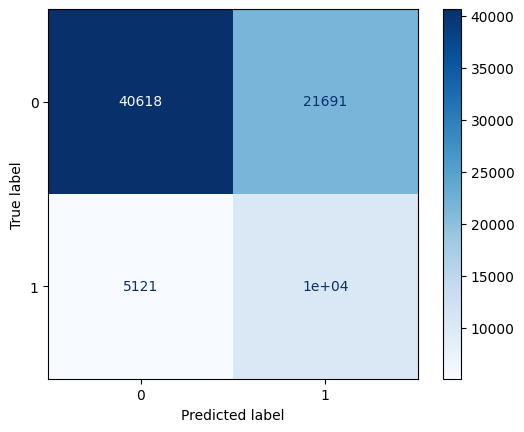

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you already have predictions
y_pred = (y_scores[:, 1] >= optimal_threshold).astype(int)  # your thresholded predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')  # You can change the color map

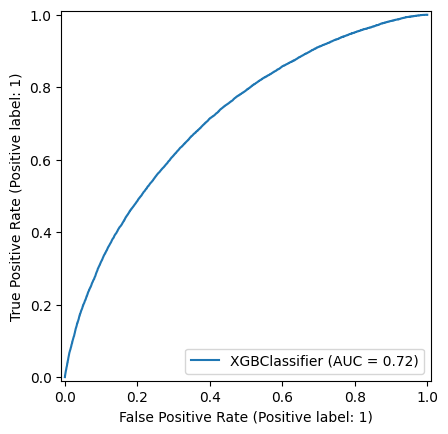

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()